In [1]:
import pandas as pd
import os
import numpy as np

def read_csv_files_to_columns(folder_path):
    all_files = os.listdir(folder_path)
    csv_files = [f for f in all_files if f.endswith('.csv')]
    
    combined_df = pd.DataFrame()
    
    for i, file in enumerate(csv_files, start=1):
        file_path = os.path.join(folder_path, file)
        # Read CSV file with the 'High' header
        df_temp = pd.read_csv(file_path, usecols=['High'])
        # Rename the column to reflect its file origin
        df_temp.rename(columns={'High': f'High_{i}'}, inplace=True)
        combined_df = pd.concat([combined_df, df_temp], axis=1)
    
    return combined_df

pumpFolder = "C:/Users/mahrouaa/CS283_Project/DataPump/CS283/new_1m_binance"
randomFolder = "C:/Users/mahrouaa/CS283_Project/DataPump/CS283/random1m"

pump_df = read_csv_files_to_columns(pumpFolder)
random_df = read_csv_files_to_columns(randomFolder)

pump_df = pump_df.iloc[:, :466]
random_df = random_df.iloc[:, :466]
print(type(pump_df))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pump_df_scaled = scaler.fit_transform(pump_df)
random_df_scaled = scaler.fit_transform(random_df)
pump_df = pd.DataFrame(pump_df_scaled, columns=pump_df.columns, index=pump_df.index)
random_df = pd.DataFrame(random_df_scaled, columns=random_df.columns, index=random_df.index)
print(type(pump_df))

pump_series = pump_df.to_numpy().T
random_series = random_df.to_numpy().T


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [2]:
pump_df

,High_1,High_2,High_3,High_4,High_5,High_6,High_7,High_8,High_9,High_10,...,High_457,High_458,High_459,High_460,High_461,High_462,High_463,High_464,High_465,High_466
0,0.128713,0.240000,0.04,0.111111,0.174242,0.513514,0.069767,0.235294,0.071090,0.006623,...,0.017241,0.093079,0.015385,0.222672,0.011811,0.003195,0.117347,0.000000,0.014989,0.108696
1,0.128713,0.243333,0.04,0.111111,0.200758,0.513514,0.093023,0.235294,0.071090,0.006623,...,0.025862,0.093079,0.015385,0.287449,0.025591,0.003195,0.117347,0.000000,0.014989,0.108696
2,0.178218,0.240000,0.04,0.111111,0.200758,0.513514,0.069767,0.235294,0.071090,0.006623,...,0.025862,0.093079,0.015385,0.287449,0.027559,0.003195,0.117347,0.000000,0.014989,0.108696
3,0.158416,0.240000,0.04,0.111111,0.200758,0.513514,0.069767,0.235294,0.071090,0.006623,...,0.034483,0.064439,0.015385,0.287449,0.027559,0.003195,0.117347,0.004098,0.014989,0.112319
4,0.158416,0.240000,0.04,0.111111,0.200758,0.513514,0.069767,0.235294,0.071090,0.006623,...,0.043103,0.064439,0.015385,0.287449,0.027559,0.003195,0.112245,0.004098,0.014989,0.112319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.366337,0.013333,0.10,0.500000,0.348485,0.000000,0.139535,0.176471,0.180095,0.426049,...,0.620690,0.085919,0.220000,0.101215,0.411417,0.217252,0.173469,0.250000,0.289079,0.010870
996,0.366337,0.013333,0.12,0.500000,0.337121,0.000000,0.116279,0.176471,0.175355,0.443709,...,0.612069,0.085919,0.218462,0.101215,0.409449,0.207668,0.178571,0.245902,0.291221,0.000000
997,0.366337,0.013333,0.12,0.500000,0.344697,0.000000,0.116279,0.176471,0.175355,0.456954,...,0.620690,0.085919,0.218462,0.101215,0.407480,0.198083,0.178571,0.245902,0.291221,0.000000
998,0.366337,0.016667,0.12,0.500000,0.337121,0.000000,0.116279,0.176471,0.175355,0.465784,...,0.620690,0.085919,0.218462,0.101215,0.405512,0.217252,0.173469,0.245902,0.289079,0.007246


In [3]:
type(pump_series)

numpy.ndarray

# Pump and non-pump

In [4]:
import numpy as np
import pandas as pd
import os
from scipy.spatial.distance import cityblock, cosine
from numpy.linalg import norm
from scipy.stats import pearsonr, wasserstein_distance, ks_2samp, moment, skew, kurtosis
from tqdm import tqdm

def calculate_metrics(series1, series2):
    euclidean_distance = norm(series1 - series2)
    manhattan_distance = cityblock(series1, series2)
    cosine_sim = 1 - cosine(series1, series2)
    correlation, _ = pearsonr(series1, series2)
    emd = wasserstein_distance(series1, series2)
    ks_stat, ks_pvalue = ks_2samp(series1, series2)
    return euclidean_distance, manhattan_distance, cosine_sim, correlation, emd, ks_stat, ks_pvalue

def calculate_group_metrics(group1, group2):
    distances = []
    for series1 in tqdm(group1):
        for series2 in group2:
            metrics = calculate_metrics(series1, series2)
            distances.append(metrics)
    distances = np.array(distances)
    means = np.mean(distances, axis=0)
    stds = np.std(distances, axis=0)
    return means, stds

def print_metrics(title, means, stds):
    metrics_names = ["Euclidean", "Manhattan", "Cosine Similarity", "Pearson Correlation", "Earth Mover's", "KS Statistic"]
    print(title + " Averages and Standard Deviations:")
    for i, name in enumerate(metrics_names):
        print(f"{name}:")
        print("  Mean:", means[i], "  Standard Deviation:", stds[i])

means_cross, stds_cross = calculate_group_metrics(pump_series, random_series)

print_metrics("Cross-Group", means_cross, stds_cross)


100%|████████████████████████████████████████████████████████████████████████████████| 466/466 [08:34<00:00,  1.10s/it]

Cross-Group Averages and Standard Deviations:
Euclidean:
  Mean: 11.50131637982231   Standard Deviation: 3.569278254569205
Manhattan:
  Mean: 304.77103711356597   Standard Deviation: 108.55789261841016
Cosine Similarity:
  Mean: 0.6793486161980439   Standard Deviation: 0.1638909341619188
Pearson Correlation:
  Mean: -0.028265982012654355   Standard Deviation: 0.40963431491794106
Earth Mover's:
  Mean: 0.24212651950218772   Standard Deviation: 0.1303985690645665
KS Statistic:
  Mean: 0.5971801147562209   Standard Deviation: 0.21437429426936


In [5]:
import numpy as np
from scipy.stats import skew, kurtosis

def calculate_moments(series):
    return {
        'mean': np.mean(series),
        'variance': np.var(series),
        'skewness': skew(series),
        'kurtosis': kurtosis(series)
    }

def aggregate_moments(data):
    moments_data = {'mean': [], 'variance': [], 'skewness': [], 'kurtosis': []}
    
    # Calculate moments for each time series
    for series in data:
        moments = calculate_moments(series)
        for key in moments:
            moments_data[key].append(moments[key])
    
    # Calculate averages and standard deviations for each moment
    aggregated_moments = {}
    for key in moments_data:
        aggregated_moments[f'avg_{key}'] = np.mean(moments_data[key])
        aggregated_moments[f'std_{key}'] = np.std(moments_data[key])
    
    return aggregated_moments

# Calculate aggregated moments for both series
aggregated_moments_pump = aggregate_moments(pump_series)
aggregated_moments_random = aggregate_moments(random_series)

print("Aggregated Moments for Pump Series:")
for key, value in aggregated_moments_pump.items():
    print(f"{key}: {value:.4f}")

print("\nAggregated Moments for Random Series:")
for key, value in aggregated_moments_random.items():
    print(f"{key}: {value:.4f}")


Aggregated Moments for Pump Series:
avg_mean: 0.1992
std_mean: 0.1034
avg_variance: 0.0231
std_variance: 0.0199
avg_skewness: 2.2963
std_skewness: 3.2683
avg_kurtosis: 24.0336
std_kurtosis: 76.8282

Aggregated Moments for Random Series:
avg_mean: 0.4127
std_mean: 0.1328
avg_variance: 0.0463
std_variance: 0.0223
avg_skewness: 0.4019
std_skewness: 1.0009
avg_kurtosis: 1.2212
std_kurtosis: 7.4486


# Real vs GAN vs VAE vs GP vs Diffusion generated

## Real vs GAN

In [6]:
print("Real")
print(type(pump_series))
print(pump_series.shape)

Real
<class 'numpy.ndarray'>
(466, 1000)


cuda


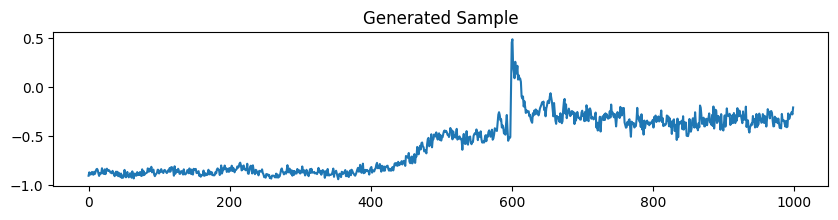

In [7]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


class Generator(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, hidden_dim),
            nn.ReLU(True),
            nn.Linear(hidden_dim, output_size),
            nn.Tanh()
        )
        
    def forward(self, x):
        return self.fc(x)


def generate_sample(generator, input_size):

    generator.eval()
    with torch.no_grad():
        noise = torch.randn(1, input_size).to(device)
        generated_sample = generator(noise)
        
        plt.figure(figsize=(10, 2))
        plt.plot(generated_sample.cpu().numpy().reshape(-1))
        plt.title("Generated Sample")
        plt.show()


input_size = 100  
hidden_dim = 256
output_size = 1000 

G = Generator(input_size, hidden_dim, output_size).to(device)
G.load_state_dict(torch.load('C:/Users/mahrouaa/CS283_Project/DataPump/CS283/pumpGAN.pth'))

G.eval()

generate_sample(G, input_size)



In [8]:
import pandas as pd
import numpy as np

def generate_multiple_samples(generator, input_size, num_samples):
    generator.eval()
    with torch.no_grad():
        noise = torch.randn(num_samples, input_size).to(device)
        generated_samples = generator(noise)
        return generated_samples.cpu().numpy().T  # Transpose to make each series a column

num_samples = 466
generated_data = generate_multiple_samples(G, input_size, num_samples)

df_generated = pd.DataFrame(generated_data)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_generated_scaled = scaler.fit_transform(df_generated)
df_generated = pd.DataFrame(df_generated_scaled, columns=df_generated.columns, index=df_generated.index)
df_generated

,0,1,2,3,4,5,6,7,8,9,...,456,457,458,459,460,461,462,463,464,465
0,0.035424,0.090345,0.007323,0.015064,0.091876,0.074272,0.003094,0.019529,0.013669,0.002655,...,0.008154,0.127951,0.007657,0.049866,0.005076,0.092322,0.000019,0.005411,0.003181,0.374595
1,0.035619,0.143352,0.007782,0.013424,0.114858,0.133936,0.007574,0.018096,0.023571,0.009846,...,0.011663,0.164941,0.008927,0.101807,0.009721,0.135060,0.000002,0.003194,0.002955,0.451302
2,0.033127,0.089593,0.002665,0.020683,0.082373,0.115428,0.001281,0.013287,0.014106,0.002773,...,0.013245,0.148371,0.004106,0.045292,0.002897,0.105815,0.000000,0.004427,0.001007,0.370363
3,0.030771,0.078902,0.002472,0.013742,0.053718,0.076102,0.001434,0.009095,0.025568,0.002735,...,0.006733,0.113528,0.003484,0.036442,0.002796,0.089790,0.000017,0.008425,0.000707,0.286375
4,0.047081,0.067745,0.009072,0.006962,0.089427,0.083258,0.005897,0.012275,0.003803,0.012255,...,0.012729,0.106455,0.009687,0.078273,0.009965,0.110153,0.000005,0.013382,0.002894,0.396334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.442822,0.042760,0.012495,0.169126,0.008537,0.080627,0.016293,0.171743,0.332682,0.001609,...,0.359654,0.035144,0.030243,0.027119,0.010224,0.190472,0.042203,0.042066,0.049635,0.018958
996,0.497862,0.018218,0.009408,0.164678,0.007717,0.069081,0.014291,0.150670,0.294539,0.000692,...,0.395554,0.031321,0.024613,0.022054,0.009017,0.186692,0.025040,0.036801,0.045304,0.012429
997,0.509307,0.006102,0.003740,0.201229,0.000236,0.050061,0.005556,0.128694,0.358578,0.000170,...,0.379706,0.027669,0.012562,0.011916,0.002956,0.186853,0.010656,0.014411,0.025320,0.000467
998,0.398725,0.058744,0.020397,0.234156,0.029452,0.098568,0.051734,0.126164,0.351201,0.002578,...,0.339443,0.076519,0.045137,0.044760,0.027527,0.231251,0.041611,0.060763,0.068723,0.028016


In [9]:
gan_series = df_generated.to_numpy().T
print("GAN")
print(type(gan_series))
print(gan_series.shape)

GAN
<class 'numpy.ndarray'>
(466, 1000)


In [10]:
import numpy as np
import pandas as pd
import os
from scipy.spatial.distance import cityblock, cosine
from numpy.linalg import norm
from scipy.stats import pearsonr, wasserstein_distance, ks_2samp, moment, skew, kurtosis
from tqdm import tqdm

def calculate_metrics(series1, series2):
    euclidean_distance = norm(series1 - series2)
    manhattan_distance = cityblock(series1, series2)
    cosine_sim = 1 - cosine(series1, series2)
    correlation, _ = pearsonr(series1, series2)
    emd = wasserstein_distance(series1, series2)
    ks_stat, ks_pvalue = ks_2samp(series1, series2)
    return euclidean_distance, manhattan_distance, cosine_sim, correlation, emd, ks_stat, ks_pvalue

def calculate_group_metrics(group1, group2):
    distances = []
    for series1 in tqdm(group1):
        for series2 in group2:
            metrics = calculate_metrics(series1, series2)
            distances.append(metrics)
    distances = np.array(distances)
    means = np.mean(distances, axis=0)
    stds = np.std(distances, axis=0)
    return means, stds

def print_metrics(title, means, stds):
    metrics_names = ["Euclidean", "Manhattan", "Cosine Similarity", "Pearson Correlation", "Earth Mover's", "KS Statistic"]
    print(title + " Averages and Standard Deviations:")
    for i, name in enumerate(metrics_names):
        print(f"{name}:")
        print("  Mean:", means[i], "  Standard Deviation:", stds[i])

# Calculate and print metrics
means_cross, stds_cross = calculate_group_metrics(pump_series, gan_series)

print_metrics("Cross-Group", means_cross, stds_cross)


100%|████████████████████████████████████████████████████████████████████████████████| 466/466 [08:34<00:00,  1.10s/it]

Cross-Group Averages and Standard Deviations:
Euclidean:
  Mean: 6.340110607887286   Standard Deviation: 2.8522610842345517
Manhattan:
  Mean: 159.54144187872242   Standard Deviation: 79.59031127894248
Cosine Similarity:
  Mean: 0.7196218942910062   Standard Deviation: 0.15988886831370377
Pearson Correlation:
  Mean: 0.35268653170531716   Standard Deviation: 0.3840877229915112
Earth Mover's:
  Mean: 0.11701082534901025   Standard Deviation: 0.07792922328376542
KS Statistic:
  Mean: 0.44563760614489084   Standard Deviation: 0.17703767448116314


In [11]:
import numpy as np
from scipy.stats import skew, kurtosis

def calculate_moments(series):
    return {
        'mean': np.mean(series),
        'variance': np.var(series),
        'skewness': skew(series),
        'kurtosis': kurtosis(series)
    }

def aggregate_moments(data):
    moments_data = {'mean': [], 'variance': [], 'skewness': [], 'kurtosis': []}
    
    # Calculate moments for each time series
    for series in data:
        moments = calculate_moments(series)
        for key in moments:
            moments_data[key].append(moments[key])
    
    # Calculate averages and standard deviations for each moment
    aggregated_moments = {}
    for key in moments_data:
        aggregated_moments[f'avg_{key}'] = np.mean(moments_data[key])
        aggregated_moments[f'std_{key}'] = np.std(moments_data[key])
    
    return aggregated_moments

# Calculate aggregated moments for both series
aggregated_moments_pump = aggregate_moments(pump_series)
aggregated_moments_random = aggregate_moments(gan_series)

print("Aggregated Moments for Pump Series:")
for key, value in aggregated_moments_pump.items():
    print(f"{key}: {value:.4f}")

print("\nAggregated Moments for Random Series:")
for key, value in aggregated_moments_random.items():
    print(f"{key}: {value:.4f}")


Aggregated Moments for Pump Series:
avg_mean: 0.1992
std_mean: 0.1034
avg_variance: 0.0231
std_variance: 0.0199
avg_skewness: 2.2963
std_skewness: 3.2683
avg_kurtosis: 24.0336
std_kurtosis: 76.8282

Aggregated Moments for Random Series:
avg_mean: 0.1521
std_mean: 0.0707
avg_variance: 0.0212
std_variance: 0.0173
avg_skewness: 2.4637
std_skewness: 2.0091
avg_kurtosis: 17.5455
std_kurtosis: 32.3819


## Real vs VAE

cuda


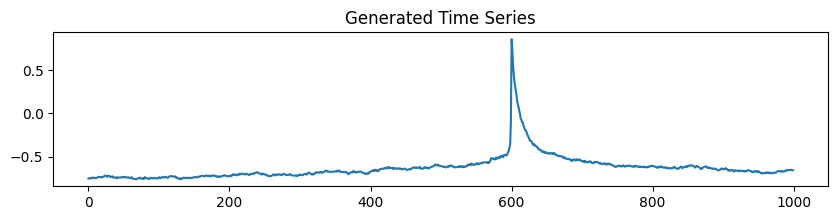

In [12]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size, dropout_rate=0.5):
        super(VAE, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size, latent_size * 2)  
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size, input_size)
        )
        
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def forward(self, x):
        x = self.encoder(x)
        mu, logvar = torch.chunk(x, 2, dim=-1)
        
        z = self.reparameterize(mu, logvar)
        
        x_recon = self.decoder(z)
        return x_recon, mu, logvar

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
latent_size=64

vae = VAE(input_size=1000, hidden_size=256, latent_size=64).to(device)
vae.load_state_dict(torch.load('C:/Users/mahrouaa/CS283_Project/DataPump/CS283/pumpVAE.pth'))
vae.eval()

def generate_sample(vae, latent_size):
    with torch.no_grad():
        z = torch.randn(1, latent_size).to(device)
        generated_time_series = vae.decoder(z)
        generated_time_series_cpu = generated_time_series.cpu()
        generated_time_series_np = generated_time_series_cpu.squeeze().numpy()

        plt.figure(figsize=(10, 2))
        plt.plot(generated_time_series_np)
        plt.title("Generated Time Series")
        plt.show()

# Generate a synthetic time series sample
generate_sample(vae, latent_size)


In [13]:
import pandas as pd
import numpy as np

def generate_multiple_samples(vae, latent_size, num_samples):
    with torch.no_grad():
        z = torch.randn(num_samples, latent_size).to(device)
        generated_time_series = vae.decoder(z)
        generated_time_series_cpu = generated_time_series.cpu()
        return generated_time_series_cpu.numpy().T  # Transpose to make each series a column

# Generate 466 synthetic time series
num_samples = 466
generated_data = generate_multiple_samples(vae, latent_size, num_samples)

# Create a DataFrame
df_generated = pd.DataFrame(generated_data)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_generated_scaled = scaler.fit_transform(df_generated)
df_generated = pd.DataFrame(df_generated_scaled, columns=df_generated.columns, index=df_generated.index)
df_generated

,0,1,2,3,4,5,6,7,8,9,...,456,457,458,459,460,461,462,463,464,465
0,0.008962,0.139424,0.086410,0.000000,0.000000,0.089838,0.157425,0.070119,0.011759,0.027071,...,0.080528,0.021208,0.221161,0.054509,0.258960,0.000000,0.003094,0.011651,0.196092,0.006726
1,0.016279,0.145500,0.090107,0.002871,0.002796,0.100133,0.160384,0.077958,0.015913,0.034370,...,0.080380,0.030671,0.218571,0.065353,0.258178,0.005980,0.007847,0.015884,0.237808,0.012373
2,0.020093,0.147074,0.090947,0.002750,0.006254,0.103704,0.159895,0.078838,0.013282,0.035475,...,0.081407,0.032006,0.220192,0.069109,0.257251,0.014162,0.008970,0.017158,0.265686,0.015956
3,0.014299,0.146803,0.091338,0.003114,0.007661,0.101088,0.160005,0.078397,0.013230,0.035346,...,0.081141,0.025644,0.221662,0.064106,0.259320,0.016004,0.008277,0.017843,0.302682,0.014409
4,0.013740,0.146955,0.092985,0.004194,0.003335,0.102324,0.161741,0.078857,0.014404,0.034762,...,0.084551,0.029348,0.221356,0.064907,0.260438,0.015415,0.008329,0.018764,0.303788,0.015557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.267117,0.011923,0.355136,0.200042,0.183632,0.007772,0.019964,0.016492,0.063137,0.011776,...,0.010778,0.518583,0.017597,0.439525,0.022372,0.355560,0.019978,0.044868,0.437907,0.312738
996,0.268122,0.010897,0.357835,0.199131,0.181615,0.017987,0.021753,0.018762,0.064553,0.012631,...,0.018570,0.523980,0.019754,0.448423,0.025434,0.353700,0.020893,0.045857,0.441500,0.312356
997,0.274990,0.012565,0.363126,0.201141,0.186076,0.019374,0.019549,0.020517,0.063442,0.015717,...,0.015574,0.524778,0.019932,0.453204,0.023449,0.357738,0.022955,0.046001,0.437034,0.316747
998,0.276760,0.012352,0.357072,0.204075,0.183592,0.014446,0.016720,0.020041,0.059397,0.012087,...,0.006183,0.526359,0.013816,0.451945,0.015211,0.356202,0.021180,0.045767,0.437510,0.318238


In [14]:
vae_series = df_generated.to_numpy().T
print("VAE")
print(type(vae_series))
print(vae_series.shape)

VAE
<class 'numpy.ndarray'>
(466, 1000)


In [15]:
import numpy as np
import pandas as pd
import os
from scipy.spatial.distance import cityblock, cosine
from numpy.linalg import norm
from scipy.stats import pearsonr, wasserstein_distance, ks_2samp, moment, skew, kurtosis
from tqdm import tqdm

def calculate_metrics(series1, series2):
    euclidean_distance = norm(series1 - series2)
    manhattan_distance = cityblock(series1, series2)
    cosine_sim = 1 - cosine(series1, series2)
    correlation, _ = pearsonr(series1, series2)
    emd = wasserstein_distance(series1, series2)
    ks_stat, ks_pvalue = ks_2samp(series1, series2)
    return euclidean_distance, manhattan_distance, cosine_sim, correlation, emd, ks_stat, ks_pvalue

def calculate_group_metrics(group1, group2):
    distances = []
    for series1 in tqdm(group1):
        for series2 in group2:
            metrics = calculate_metrics(series1, series2)
            distances.append(metrics)
    distances = np.array(distances)
    means = np.mean(distances, axis=0)
    stds = np.std(distances, axis=0)
    return means, stds

def print_metrics(title, means, stds):
    metrics_names = ["Euclidean", "Manhattan", "Cosine Similarity", "Pearson Correlation", "Earth Mover's", "KS Statistic"]
    print(title + " Averages and Standard Deviations:")
    for i, name in enumerate(metrics_names):
        print(f"{name}:")
        print("  Mean:", means[i], "  Standard Deviation:", stds[i])

# Calculate and print metrics
means_cross, stds_cross = calculate_group_metrics(pump_series, vae_series)

print_metrics("Cross-Group", means_cross, stds_cross)


100%|████████████████████████████████████████████████████████████████████████████████| 466/466 [07:53<00:00,  1.02s/it]

Cross-Group Averages and Standard Deviations:
Euclidean:
  Mean: 6.177648550665289   Standard Deviation: 2.8214299780063485
Manhattan:
  Mean: 158.52491298799654   Standard Deviation: 78.23113045139877
Cosine Similarity:
  Mean: 0.7646652271671419   Standard Deviation: 0.15411581545767944
Pearson Correlation:
  Mean: 0.35955298298385857   Standard Deviation: 0.4402061039651679
Earth Mover's:
  Mean: 0.11328204200519605   Standard Deviation: 0.07150675149803822
KS Statistic:
  Mean: 0.4411211203006064   Standard Deviation: 0.167319430571717


In [16]:
import numpy as np
from scipy.stats import skew, kurtosis

def calculate_moments(series):
    return {
        'mean': np.mean(series),
        'variance': np.var(series),
        'skewness': skew(series),
        'kurtosis': kurtosis(series)
    }

def aggregate_moments(data):
    moments_data = {'mean': [], 'variance': [], 'skewness': [], 'kurtosis': []}
    
    # Calculate moments for each time series
    for series in data:
        moments = calculate_moments(series)
        for key in moments:
            moments_data[key].append(moments[key])
    
    # Calculate averages and standard deviations for each moment
    aggregated_moments = {}
    for key in moments_data:
        aggregated_moments[f'avg_{key}'] = np.mean(moments_data[key])
        aggregated_moments[f'std_{key}'] = np.std(moments_data[key])
    
    return aggregated_moments

# Calculate aggregated moments for both series
aggregated_moments_pump = aggregate_moments(pump_series)
aggregated_moments_random = aggregate_moments(vae_series)

print("Aggregated Moments for Pump Series:")
for key, value in aggregated_moments_pump.items():
    print(f"{key}: {value:.4f}")

print("\nAggregated Moments for Random Series:")
for key, value in aggregated_moments_random.items():
    print(f"{key}: {value:.4f}")


Aggregated Moments for Pump Series:
avg_mean: 0.1992
std_mean: 0.1034
avg_variance: 0.0231
std_variance: 0.0199
avg_skewness: 2.2963
std_skewness: 3.2683
avg_kurtosis: 24.0336
std_kurtosis: 76.8282

Aggregated Moments for Random Series:
avg_mean: 0.1831
std_mean: 0.0695
avg_variance: 0.0214
std_variance: 0.0175
avg_skewness: 1.7627
std_skewness: 1.6311
avg_kurtosis: 10.8251
std_kurtosis: 18.7386


## Real vs GP

In [17]:
import os
import pandas as pd
import numpy as np

folder_path = r"C:\Users\mahrouaa\CS283_Project\DataPump\CS283\new_1m_binance"

returns_list = []

for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, usecols=['returns'])
        returns_list.append(df)

all_returns_df = pd.concat(returns_list, axis=1)
all_returns_df = all_returns_df.drop(all_returns_df.index[0])
all_returns_df

,returns,returns,returns,returns,returns,returns,returns,returns,returns,returns,...,returns,returns,returns,returns,returns,returns,returns,returns,returns,returns
1,0.000000,0.242718,0.000000,0.000000,0.168350,0.0,0.724638,0.0,0.000000,0.000000,...,0.037383,0.000000,0.000000,0.669176,0.420673,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.447227,-0.242131,0.000000,0.000000,0.000000,0.0,-0.719424,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.059844,0.000000,0.000000,0.000000,0.000000,0.000000
3,-0.178094,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.037369,-0.340909,0.000000,0.000000,0.000000,0.000000,0.000000,0.269542,0.000000,0.229885
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.037355,0.000000,0.000000,0.000000,0.000000,0.000000,-0.333333,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.255102,-0.096038,0.0,-0.724638,0.0,0.000000,0.419580,...,0.037341,0.000000,0.036576,0.000000,0.000000,0.000000,0.000000,0.268817,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.291545,0.000000,0.000000,-0.402748,0.0,0.000000,0.0,0.000000,0.247525,...,0.000000,0.000000,0.773286,0.000000,-0.107009,0.800000,0.322581,0.000000,0.000000,0.740741
996,0.000000,0.000000,0.234192,0.000000,-0.071361,0.0,-0.709220,0.0,-0.094967,0.493827,...,-0.036430,0.000000,-0.034880,0.000000,-0.053562,-0.595238,0.321543,-0.231481,0.182482,-0.735294
997,0.000000,0.000000,0.000000,0.000000,0.047608,0.0,0.000000,0.0,0.000000,0.368550,...,0.036443,0.000000,0.000000,0.000000,-0.053591,-0.598802,0.000000,0.000000,0.000000,0.000000
998,0.000000,0.290698,0.000000,0.000000,-0.047585,0.0,0.000000,0.0,0.000000,0.244798,...,0.000000,0.000000,0.000000,0.000000,-0.053619,1.204819,-0.320513,0.000000,-0.182149,0.493827


In [18]:
mean_vector = all_returns_df.mean(axis=1)
stdev_vector = all_returns_df.std(axis=1)

df_generated = pd.DataFrame()

initial_price=100
num_series=466

for series_idx in range(num_series):
    return_vector = np.random.normal(mean_vector, stdev_vector)
    price_vector = [initial_price]
    
    for ret in return_vector:
        new_price = price_vector[-1] * (1 + (ret / 100))
        price_vector.append(new_price)
    
    df_generated[f'Series_{series_idx+1}'] = price_vector


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_generated_scaled = scaler.fit_transform(df_generated)
df_generated = pd.DataFrame(df_generated_scaled, columns=df_generated.columns, index=df_generated.index)
df_generated

C:\Users\mahrouaa\AppData\Local\Temp\ipykernel_23952\2860553492.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_generated[f'Series_{series_idx+1}'] = price_vector
C:\Users\mahrouaa\AppData\Local\Temp\ipykernel_23952\2860553492.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_generated[f'Series_{series_idx+1}'] = price_vector
C:\Users\mahrouaa\AppData\Local\Temp\ipykernel_23952\2860553492.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whi

,Series_1,Series_2,Series_3,Series_4,Series_5,Series_6,Series_7,Series_8,Series_9,Series_10,...,Series_457,Series_458,Series_459,Series_460,Series_461,Series_462,Series_463,Series_464,Series_465,Series_466
0,0.078424,0.384683,0.120779,0.818717,0.976949,0.104989,0.068763,0.647441,0.729400,0.929890,...,0.069507,0.021884,0.765643,0.838787,0.862227,0.021439,0.694559,0.025234,0.133348,0.509905
1,0.083216,0.379374,0.117164,0.815622,0.972644,0.103354,0.066386,0.637754,0.720708,0.930314,...,0.072649,0.022207,0.769567,0.842340,0.862387,0.018363,0.698280,0.024744,0.134817,0.508711
2,0.076767,0.382053,0.114274,0.812002,0.973519,0.101698,0.069443,0.640936,0.717557,0.930456,...,0.072320,0.021661,0.773695,0.853385,0.863540,0.017745,0.701529,0.023678,0.131053,0.508972
3,0.079095,0.381661,0.105347,0.811855,0.974551,0.102691,0.066653,0.640186,0.721412,0.930198,...,0.072515,0.021499,0.771458,0.856920,0.864361,0.015189,0.705978,0.024381,0.129566,0.507188
4,0.084496,0.386604,0.100599,0.810920,0.977297,0.101894,0.059230,0.641598,0.725859,0.925852,...,0.073504,0.021359,0.771880,0.851842,0.864086,0.008408,0.714033,0.026605,0.134808,0.510537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.468312,0.158326,0.245120,0.064966,0.000090,0.347528,0.130797,0.023349,0.016644,0.007469,...,0.690464,0.924030,0.007814,0.149636,0.182341,0.797538,0.060137,0.597184,0.865521,0.033392
996,0.465759,0.162627,0.252322,0.065414,0.000074,0.346876,0.135274,0.024702,0.017424,0.006224,...,0.684277,0.925932,0.007693,0.148746,0.179963,0.790399,0.055093,0.602730,0.874577,0.033553
997,0.476922,0.166792,0.258927,0.065429,0.000012,0.355725,0.140287,0.018686,0.019099,0.008677,...,0.686570,0.928542,0.007664,0.148302,0.178549,0.788432,0.047664,0.597673,0.866141,0.032914
998,0.479016,0.167209,0.257851,0.064599,0.000033,0.352870,0.143899,0.016951,0.014877,0.007331,...,0.688150,0.928115,0.007613,0.151251,0.179935,0.784405,0.036246,0.598873,0.854049,0.034159


In [19]:
gp_series = df_generated.to_numpy().T
print("GP")
print(type(gp_series))
print(gp_series.shape)

GP
<class 'numpy.ndarray'>
(466, 1000)


In [20]:
import numpy as np
import pandas as pd
import os
from scipy.spatial.distance import cityblock, cosine
from numpy.linalg import norm
from scipy.stats import pearsonr, wasserstein_distance, ks_2samp, moment, skew, kurtosis
from tqdm import tqdm

def calculate_metrics(series1, series2):
    euclidean_distance = norm(series1 - series2)
    manhattan_distance = cityblock(series1, series2)
    cosine_sim = 1 - cosine(series1, series2)
    correlation, _ = pearsonr(series1, series2)
    emd = wasserstein_distance(series1, series2)
    ks_stat, ks_pvalue = ks_2samp(series1, series2)
    return euclidean_distance, manhattan_distance, cosine_sim, correlation, emd, ks_stat, ks_pvalue

def calculate_group_metrics(group1, group2):
    distances = []
    for series1 in tqdm(group1):
        for series2 in group2:
            metrics = calculate_metrics(series1, series2)
            distances.append(metrics)
    distances = np.array(distances)
    means = np.mean(distances, axis=0)
    stds = np.std(distances, axis=0)
    return means, stds

def print_metrics(title, means, stds):
    metrics_names = ["Euclidean", "Manhattan", "Cosine Similarity", "Pearson Correlation", "Earth Mover's", "KS Statistic"]
    print(title + " Averages and Standard Deviations:")
    for i, name in enumerate(metrics_names):
        print(f"{name}:")
        print("  Mean:", means[i], "  Standard Deviation:", stds[i])

# Calculate and print metrics
means_cross, stds_cross = calculate_group_metrics(pump_series, gp_series)

print_metrics("Cross-Group", means_cross, stds_cross)


100%|████████████████████████████████████████████████████████████████████████████████| 466/466 [08:26<00:00,  1.09s/it]

Cross-Group Averages and Standard Deviations:
Euclidean:
  Mean: 12.17091979388516   Standard Deviation: 5.486176169855333
Manhattan:
  Mean: 322.64981921576896   Standard Deviation: 161.51419860154934
Cosine Similarity:
  Mean: 0.6579363345921393   Standard Deviation: 0.23114086264334677
Pearson Correlation:
  Mean: 0.07579528323292488   Standard Deviation: 0.5991120510908369
Earth Mover's:
  Mean: 0.24147950646139177   Standard Deviation: 0.12521646453115587
KS Statistic:
  Mean: 0.5211467700639022   Standard Deviation: 0.152450766507571


In [21]:
import numpy as np
from scipy.stats import skew, kurtosis

def calculate_moments(series):
    return {
        'mean': np.mean(series),
        'variance': np.var(series),
        'skewness': skew(series),
        'kurtosis': kurtosis(series)
    }

def aggregate_moments(data):
    moments_data = {'mean': [], 'variance': [], 'skewness': [], 'kurtosis': []}
    
    # Calculate moments for each time series
    for series in data:
        moments = calculate_moments(series)
        for key in moments:
            moments_data[key].append(moments[key])
    
    # Calculate averages and standard deviations for each moment
    aggregated_moments = {}
    for key in moments_data:
        aggregated_moments[f'avg_{key}'] = np.mean(moments_data[key])
        aggregated_moments[f'std_{key}'] = np.std(moments_data[key])
    
    return aggregated_moments

aggregated_moments_pump = aggregate_moments(pump_series)
aggregated_moments_random = aggregate_moments(gp_series)

print("Aggregated Moments for Pump Series:")
for key, value in aggregated_moments_pump.items():
    print(f"{key}: {value:.4f}")

print("\nAggregated Moments for Random Series:")
for key, value in aggregated_moments_random.items():
    print(f"{key}: {value:.4f}")


Aggregated Moments for Pump Series:
avg_mean: 0.1992
std_mean: 0.1034
avg_variance: 0.0231
std_variance: 0.0199
avg_skewness: 2.2963
std_skewness: 3.2683
avg_kurtosis: 24.0336
std_kurtosis: 76.8282

Aggregated Moments for Random Series:
avg_mean: 0.3787
std_mean: 0.1372
avg_variance: 0.0955
std_variance: 0.0600
avg_skewness: 0.3519
std_skewness: 0.9930
avg_kurtosis: 0.7554
std_kurtosis: 12.0432


## Real vs Diffusion

In [25]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

file_path = "C:\\Users\\mahrouaa\\Downloads\\generated_time_series.csv"
data = pd.read_csv(file_path)

sampled_data = data.sample(466, random_state=42)

df_generated = sampled_data
new_column_names = [f"Gen_{i+1}" for i in range(df_generated.shape[1])]
df_generated.columns = new_column_names

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_generated_scaled = scaler.fit_transform(df_generated)
df_generated = pd.DataFrame(df_generated_scaled, columns=df_generated.columns, index=df_generated.index)
df_generated

,Gen_1,Gen_2,Gen_3,Gen_4,Gen_5,Gen_6,Gen_7,Gen_8,Gen_9,Gen_10,...,Gen_991,Gen_992,Gen_993,Gen_994,Gen_995,Gen_996,Gen_997,Gen_998,Gen_999,Gen_1000
521,0.603774,0.613518,0.607253,0.611803,0.611103,0.729286,0.739469,0.743486,0.592572,0.538507,...,0.870106,0.865956,0.880425,0.885463,0.875827,0.875477,0.879026,0.854817,0.866790,0.854119
737,0.394953,0.392880,0.385303,0.396104,0.400489,0.400060,0.457865,0.444253,0.352520,0.272905,...,0.009447,0.017451,0.019248,0.015094,0.000000,0.039130,0.044454,0.042597,0.004771,0.011904
740,0.242964,0.251788,0.254107,0.244756,0.248764,0.248493,0.261018,0.297033,0.247915,0.136241,...,0.000000,0.000006,0.000000,0.002214,0.000000,0.067467,0.058966,0.073796,0.014733,0.000000
660,0.041005,0.044981,0.049136,0.054325,0.006107,0.017767,0.023442,0.015682,0.013614,0.001781,...,0.289419,0.318019,0.243764,0.267688,0.280681,0.385508,0.434264,0.395554,0.330427,0.282687
411,0.651257,0.600445,0.608047,0.601590,0.596579,0.715234,0.743741,0.734254,0.594409,0.553974,...,0.000000,0.004314,0.000000,0.000000,0.000000,0.091508,0.080760,0.095072,0.006488,0.000117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0.143680,0.155017,0.154111,0.152709,0.154117,0.157555,0.145882,0.224179,0.216872,0.129425,...,0.081400,0.080487,0.069619,0.097905,0.000000,0.131504,0.178423,0.170809,0.113421,0.080068
598,0.608504,0.545127,0.579039,0.580908,0.578238,0.709524,0.756562,0.746650,0.574961,0.527584,...,0.836170,0.837929,0.820485,0.849639,0.858258,0.842815,0.843194,0.827561,0.819438,0.779849
961,0.600129,0.605762,0.605860,0.607071,0.597249,0.697597,0.725642,0.726300,0.616852,0.536346,...,0.009074,0.010570,0.002143,0.000000,0.000000,0.067427,0.072238,0.064840,0.000000,0.001832
390,0.611109,0.617581,0.608551,0.619655,0.619213,0.746051,0.750475,0.749464,0.602277,0.557629,...,0.000000,0.000000,0.000000,0.008572,0.000000,0.103437,0.102406,0.087221,0.000000,0.000000


In [26]:
diff_series = df_generated.to_numpy()
print("Diffusion")
print(type(diff_series))
print(diff_series.shape)

Diffusion
<class 'numpy.ndarray'>
(466, 1000)


In [27]:
import numpy as np
import pandas as pd
import os
from scipy.spatial.distance import cityblock, cosine
from numpy.linalg import norm
from scipy.stats import pearsonr, wasserstein_distance, ks_2samp, moment, skew, kurtosis
from tqdm import tqdm

def calculate_metrics(series1, series2):
    euclidean_distance = norm(series1 - series2)
    manhattan_distance = cityblock(series1, series2)
    cosine_sim = 1 - cosine(series1, series2)
    correlation, _ = pearsonr(series1, series2)
    emd = wasserstein_distance(series1, series2)
    ks_stat, ks_pvalue = ks_2samp(series1, series2)
    return euclidean_distance, manhattan_distance, cosine_sim, correlation, emd, ks_stat, ks_pvalue

def calculate_group_metrics(group1, group2):
    distances = []
    for series1 in tqdm(group1):
        for series2 in group2:
            metrics = calculate_metrics(series1, series2)
            distances.append(metrics)
    distances = np.array(distances)
    means = np.mean(distances, axis=0)
    stds = np.std(distances, axis=0)
    return means, stds

def print_metrics(title, means, stds):
    metrics_names = ["Euclidean", "Manhattan", "Cosine Similarity", "Pearson Correlation", "Earth Mover's", "KS Statistic"]
    print(title + " Averages and Standard Deviations:")
    for i, name in enumerate(metrics_names):
        print(f"{name}:")
        print("  Mean:", means[i], "  Standard Deviation:", stds[i])

# Calculate and print metrics
means_cross, stds_cross = calculate_group_metrics(pump_series, diff_series)

print_metrics("Cross-Group", means_cross, stds_cross)


100%|████████████████████████████████████████████████████████████████████████████████| 466/466 [08:56<00:00,  1.15s/it]

Cross-Group Averages and Standard Deviations:
Euclidean:
  Mean: 9.331602335757523   Standard Deviation: 2.258352799881731
Manhattan:
  Mean: 229.59957246207523   Standard Deviation: 70.12103183187938
Cosine Similarity:
  Mean: 0.4608328312679555   Standard Deviation: 0.16311978841744013
Pearson Correlation:
  Mean: 0.0008082669057942065   Standard Deviation: 0.2949601074443124
Earth Mover's:
  Mean: 0.1374249943674262   Standard Deviation: 0.058171765681964624
KS Statistic:
  Mean: 0.4795135294442772   Standard Deviation: 0.11088422522620965


In [28]:
import numpy as np
from scipy.stats import skew, kurtosis

def calculate_moments(series):
    return {
        'mean': np.mean(series),
        'variance': np.var(series),
        'skewness': skew(series),
        'kurtosis': kurtosis(series)
    }

def aggregate_moments(data):
    moments_data = {'mean': [], 'variance': [], 'skewness': [], 'kurtosis': []}
    
    # Calculate moments for each time series
    for series in data:
        moments = calculate_moments(series)
        for key in moments:
            moments_data[key].append(moments[key])
    
    # Calculate averages and standard deviations for each moment
    aggregated_moments = {}
    for key in moments_data:
        aggregated_moments[f'avg_{key}'] = np.mean(moments_data[key])
        aggregated_moments[f'std_{key}'] = np.std(moments_data[key])
    
    return aggregated_moments

# Calculate aggregated moments for both series
aggregated_moments_pump = aggregate_moments(pump_series)
aggregated_moments_random = aggregate_moments(diff_series)

print("Aggregated Moments for Pump Series:")
for key, value in aggregated_moments_pump.items():
    print(f"{key}: {value:.4f}")

print("\nAggregated Moments for Random Series:")
for key, value in aggregated_moments_random.items():
    print(f"{key}: {value:.4f}")


Aggregated Moments for Pump Series:
avg_mean: 0.1992
std_mean: 0.1034
avg_variance: 0.0231
std_variance: 0.0199
avg_skewness: 2.2963
std_skewness: 3.2683
avg_kurtosis: 24.0336
std_kurtosis: 76.8282

Aggregated Moments for Random Series:
avg_mean: 0.1711
std_mean: 0.0437
avg_variance: 0.0557
std_variance: 0.0197
avg_skewness: 1.2579
std_skewness: 0.2997
avg_kurtosis: 0.3672
std_kurtosis: 0.9214
